In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#a
for i in range(0,1000):
    
    def pr(p, q, v):
        
        if v == 3:
            
            return p * q
        
        elif v == 4:
            
            return p * (1 - q) + q*(1 - p) 
        
        elif v == 5:
            
            return (1 - q) * (1 - p)
        
        return 0

In [20]:
pr(0.6,0.7,4)

0.45999999999999996

In [21]:
pr(0.8,0.3,3)

0.24

In [22]:
pr(0.5,0.5,5)

0.25

In [6]:
#b
def log_likelihood(p, q, X):
    o = 0
    for v in X:
        o = o + np.log(pr(p, q, v))
        
    return o
X = 148*[3]  + 529*[4]  + 323*[5] 

In [25]:
log_likelihood(0.48, 0.6, X)

-1053.8694823687324

In [14]:
#c

p = np.linspace(0.01, .99, 100)
q = np.linspace(0.01, .99, 100)
pp, qq = np.meshgrid(p, q)

In [15]:
C=np.zeros(pp.shape)

In [16]:
for i in range(pp.shape[0]):
    for j in range(qq.shape[0]):
        C[i, j] = log_likelihood(pp[i, j], qq[i, j], X)

-984.6631040407523

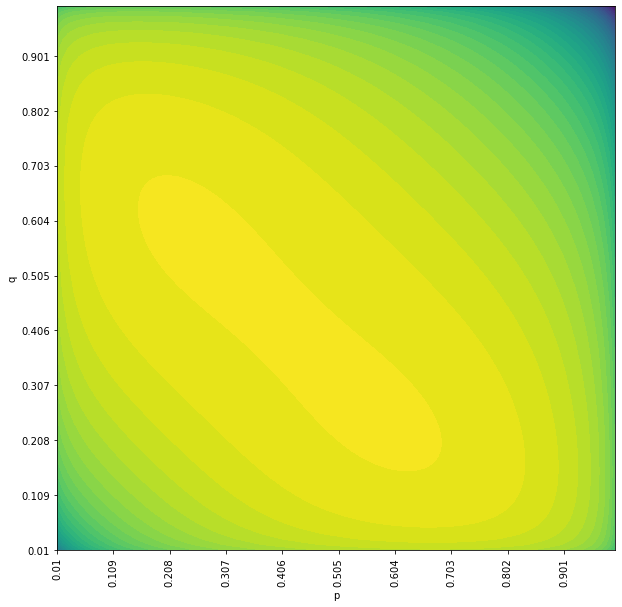

In [19]:
plt.figure(figsize=(10, 10))
plt.contourf(C, levels=40)
plt.xticks(np.arange(p.shape[0])[::10], p.round(3)[::10], rotation=90)
plt.yticks(np.arange(q.shape[0])[::10], q.round(3)[::10])
plt.xlabel('p')
plt.ylabel('q')
C.max()

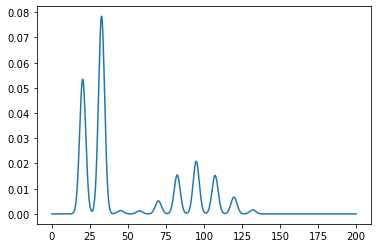

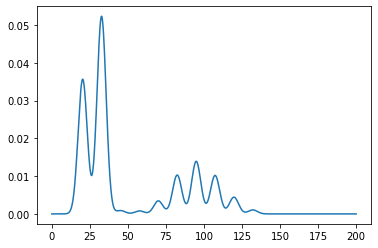

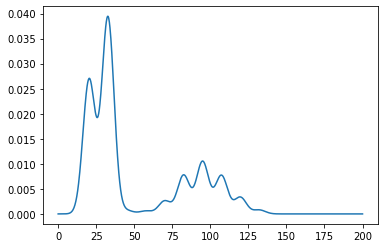

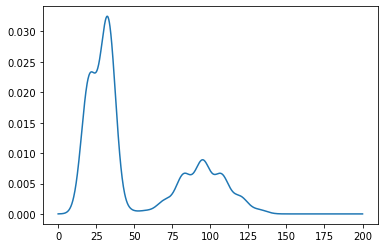

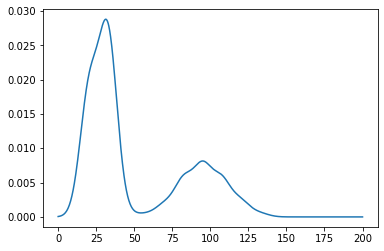

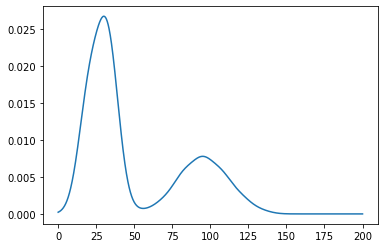

In [27]:

#2
def normal_kernel(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(- x ** 2 / 2)
def KDE(kernel, bandwidth, X):
    return np.vectorize(lambda v: kernel((X - v) / bandwidth).mean() / bandwidth)
X = np.array([20.3] * 402 + [32.7] * 590 + [45.2] * 10 + [57.6] * 9 + 
            [70] * 39 + [82.4] * 116 + [94.9] * 157 + [107.3] * 115 + 
            [119.7] * 50 + [132.1] * 12)
for h in [2,3,4,5,6,7]:
    kde_pdf = KDE(normal_kernel, h, X)
    xx = np.linspace(0, 200, 1000)
    yy = kde_pdf(xx)
    plt.plot(xx, yy)
    plt.show()

In [ ]:
#It seems when bandwidth is 5 or 6 we get smooth graphs compared with others.